In [1]:
# https://github.com/raduangelescu/gutenbergpy
!pip install gutenbergpy

import gutenbergpy.textget

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.stem.snowball import SnowballStemmer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Origen de datos

In [4]:
def obtener_libro(id = 2701):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

libro_limpio, libro = obtener_libro()
str_libro = libro_limpio.decode()
list_libro = str_libro.split("\r\n")
libro_filitrado = list(filter(None, list_libro))
libro_filitrado[:20]

['MOBY-DICK;',
 'or, THE WHALE.',
 'By Herman Melville',
 'CONTENTS',
 'ETYMOLOGY.',
 'EXTRACTS (Supplied by a Sub-Sub-Librarian).',
 'CHAPTER 1. Loomings.',
 'CHAPTER 2. The Carpet-Bag.',
 'CHAPTER 3. The Spouter-Inn.',
 'CHAPTER 4. The Counterpane.',
 'CHAPTER 5. Breakfast.',
 'CHAPTER 6. The Street.',
 'CHAPTER 7. The Chapel.',
 'CHAPTER 8. The Pulpit.',
 'CHAPTER 9. The Sermon.',
 'CHAPTER 10. A Bosom Friend.',
 'CHAPTER 11. Nightgown.',
 'CHAPTER 12. Biographical.',
 'CHAPTER 13. Wheelbarrow.',
 'CHAPTER 14. Nantucket.']

## Tokenización

In [5]:
def tokenizar(txt):
    texto_limpio = re.sub(r'[^\w\s]', '', txt.lower()) # Eliminamos signos de puntuación y ponemos todo en minúsculas

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

map_libro = list(map(tokenizar, libro_filitrado))
tokens = []
for token in map_libro:
    tokens.extend(token)

## Lematización

In [6]:
# Idiomas incluidos
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [7]:
# Creación de stemmer que ignora palabras vacías
stemmer = SnowballStemmer("english")

In [8]:
# Prueba unitaria
print(stemmer.stem("running"))

run


In [9]:
lematizado = [stemmer.stem(x) for x in tokens]

## Conteo de frecuencias

In [10]:
df = pd.DataFrame(lematizado)
conteo_frecuencias = df.value_counts()
df_frecuencias = conteo_frecuencias.to_frame()
df_frecuencias.reset_index(inplace = True)
df_frecuencias.columns = ['token', 'conteo']

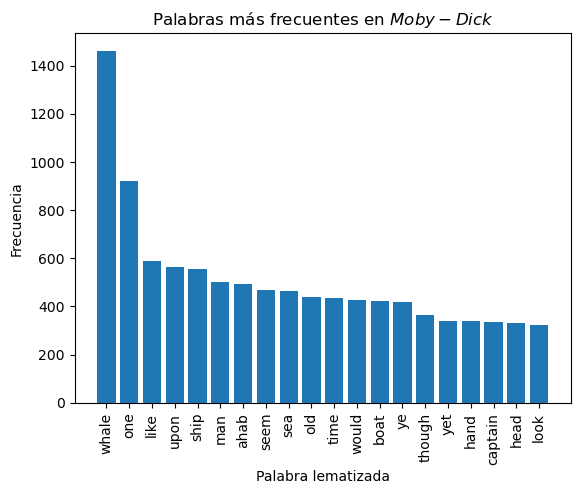

In [11]:
plt.figure()
plt.title('Palabras más frecuentes en $\it{Moby-Dick}$')
plt.bar(df_frecuencias.iloc[:20].token, df_frecuencias.iloc[:20].conteo)
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.xlabel('Palabra lematizada')
plt.show()

## Por capítulos

In [12]:
series_libro = pd.Series(libro_filitrado)
series_libro = series_libro.str.lower()
id_capítulos = series_libro.str.contains(r'^chapter \d+\.', regex=True)
id_capítulos = series_libro[id_capítulos].loc[522:]
id_capítulos

522                            chapter 1. loomings.
706                      chapter 2. the carpet-bag.
826                     chapter 3. the spouter-inn.
1320                    chapter 4. the counterpane.
1455                          chapter 5. breakfast.
                            ...                    
17715    chapter 131. the pequod meets the delight.
17755                    chapter 132. the symphony.
17893             chapter 133. the chase—first day.
18209            chapter 134. the chase—second day.
18498            chapter 135. the chase.—third day.
Length: 135, dtype: object

In [13]:
# Si este es el capítulo 1
c1 = series_libro.loc[522:705]
c1

522                                 chapter 1. loomings.
523    call me ishmael. some years ago—never mind how...
524    little or no money in my purse, and nothing pa...
525    on shore, i thought i would sail about a littl...
526    of the world. it is a way i have of driving of...
                             ...                        
701    by reason of these things, then, the whaling v...
702    great flood-gates of the wonder-world swung op...
703    conceits that swayed me to my purpose, two and...
704    my inmost soul, endless processions of the wha...
705    all, one grand hooded phantom, like a snow hil...
Length: 184, dtype: object

In [14]:
# Cardinalidad de índices
idx = id_capítulos.index
len(idx)

135

In [15]:
caps = []
rangos = []
for i in range(134):
    caps.append(series_libro.iloc[id_capítulos.index[i]:id_capítulos.index[i+1]])
    rangos.append((id_capítulos.index[i], id_capítulos.index[i+1]))

In [16]:
caps[0]

522                                 chapter 1. loomings.
523    call me ishmael. some years ago—never mind how...
524    little or no money in my purse, and nothing pa...
525    on shore, i thought i would sail about a littl...
526    of the world. it is a way i have of driving of...
                             ...                        
701    by reason of these things, then, the whaling v...
702    great flood-gates of the wonder-world swung op...
703    conceits that swayed me to my purpose, two and...
704    my inmost soul, endless processions of the wha...
705    all, one grand hooded phantom, like a snow hil...
Length: 184, dtype: object

In [17]:
caps[1]

706                           chapter 2. the carpet-bag.
707    i stuffed a shirt or two into my old carpet-ba...
708    arm, and started for cape horn and the pacific...
709    of old manhatto, i duly arrived in new bedford...
710    in december. much was i disappointed upon lear...
                             ...                        
821    czar in an ice palace made of frozen sighs, an...
822    temperance society, he only drinks the tepid t...
823    but no more of this blubbering now, we are goi...
824    is plenty of that yet to come. let us scrape t...
825    feet, and see what sort of a place this “spout...
Length: 120, dtype: object

In [18]:
df_libro = pd.DataFrame(series_libro)
df_libro = df_libro.iloc[id_capítulos.index[0]:,]
df_libro

,0
522,chapter 1. loomings.
523,call me ishmael. some years ago—never mind how...
524,"little or no money in my purse, and nothing pa..."
525,"on shore, i thought i would sail about a littl..."
526,of the world. it is a way i have of driving of...
...,...
18908,"unharming sharks, they glided by as if with pa..."
18909,the savage sea-hawks sailed with sheathed beak...
18910,"sail drew near, nearer, and picked me up at la..."
18911,"devious-cruising rachel, that in her retracing..."


In [19]:
rangos[:5]

[(522, 706), (706, 826), (826, 1320), (1320, 1455), (1455, 1522)]

In [20]:
def asignar_numero_por_rango(idx):
    contador = 1
    for i, rango in enumerate(rangos):
        if idx in range(rango[0], rango[1]):
            return contador
        contador += 1
    return None
df_libro['cap'] = df_libro.index.map(asignar_numero_por_rango)
df_libro = df_libro.dropna()
df_libro['cap'] = df_libro['cap'].astype(int)
df_libro.columns = ['texto', 'cap']
df_libro

C:\Users\PC\AppData\Local\Temp\ipykernel_7208\211654685.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_libro['cap'] = df_libro['cap'].astype(int)


,texto,cap
522,chapter 1. loomings.,1
523,call me ishmael. some years ago—never mind how...,1
524,"little or no money in my purse, and nothing pa...",1
525,"on shore, i thought i would sail about a littl...",1
526,of the world. it is a way i have of driving of...,1
...,...,...
18493,sharpening their fresh weapons for the morrow....,134
18494,keel of ahab’s wrecked craft the carpenter mad...,134
18495,"still as on the night before, slouched ahab st...",134
18496,"scuttle; his hid, heliotrope glance anticipati...",134


In [21]:
df_libro['token'] = df_libro['texto'].apply(lambda x : tokenizar(x))
df_libro

C:\Users\PC\AppData\Local\Temp\ipykernel_7208\2487251728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_libro['token'] = df_libro['texto'].apply(lambda x : tokenizar(x))


,texto,cap,token
522,chapter 1. loomings.,1,"[chapter, 1, loomings]"
523,call me ishmael. some years ago—never mind how...,1,"[call, ishmael, years, agonever, mind, long, p..."
524,"little or no money in my purse, and nothing pa...",1,"[little, money, purse, nothing, particular, in..."
525,"on shore, i thought i would sail about a littl...",1,"[shore, thought, would, sail, little, see, wat..."
526,of the world. it is a way i have of driving of...,1,"[world, way, driving, spleen]"
...,...,...,...
18493,sharpening their fresh weapons for the morrow....,134,"[sharpening, fresh, weapons, morrow, meantime,..."
18494,keel of ahab’s wrecked craft the carpenter mad...,134,"[keel, ahabs, wrecked, craft, carpenter, made,..."
18495,"still as on the night before, slouched ahab st...",134,"[still, night, slouched, ahab, stood, fixed, w..."
18496,"scuttle; his hid, heliotrope glance anticipati...",134,"[scuttle, hid, heliotrope, glance, anticipatin..."


In [22]:
df_tokens_cap = df_libro.explode(column='token').drop(columns='texto')
df_tokens_cap

,cap,token
522,1,chapter
522,1,1
522,1,loomings
523,1,call
523,1,ishmael
...,...,...
18497,134,sat
18497,134,due
18497,134,eastward
18497,134,earliest


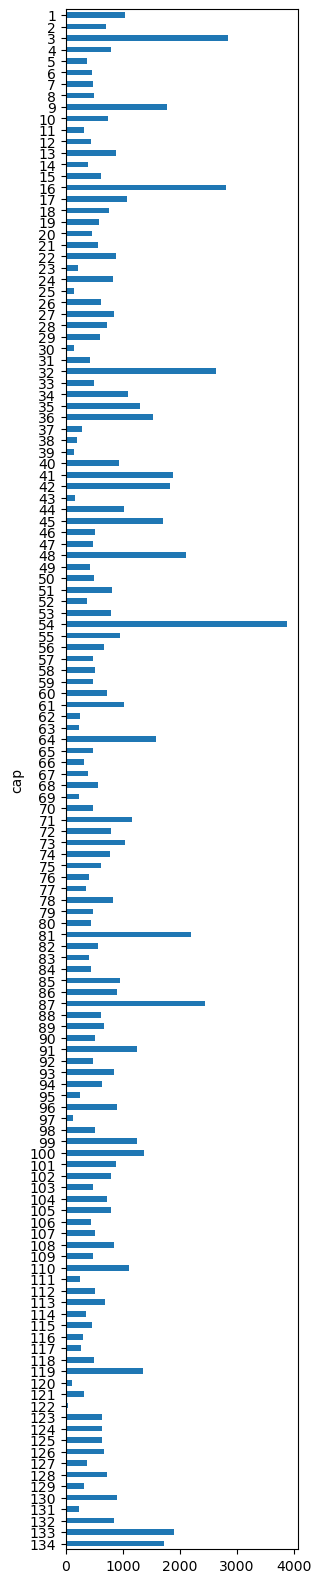

In [23]:
# Frecuencia de palabras por capítulo
plt.figure()
df_tokens_cap.groupby(by='cap')['token'].count().plot(kind= 'barh', figsize=(3, 20))
plt.gca().invert_yaxis()
plt.show()

<Figure size 640x480 with 0 Axes>

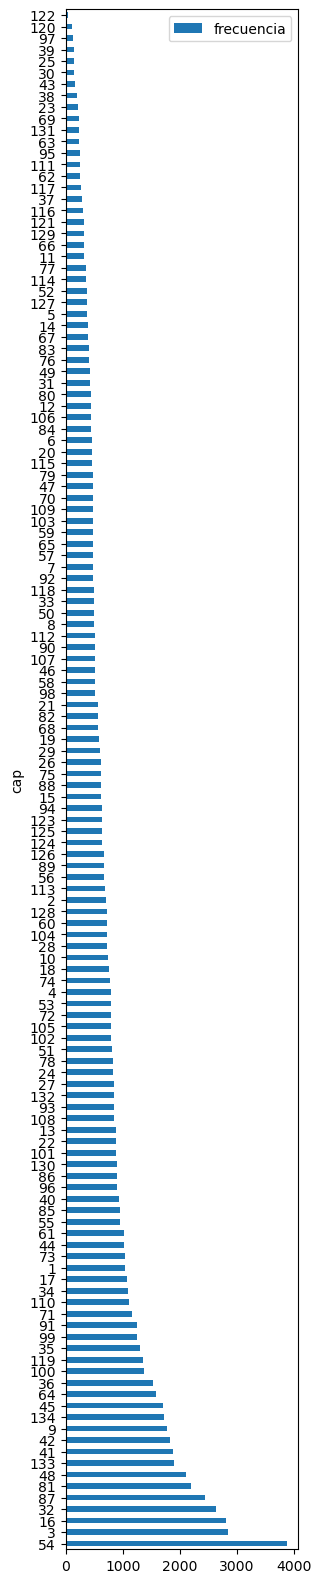

In [24]:
# Ordenadas por conteo
pd_caps_freq_ord = pd.DataFrame(df_tokens_cap.groupby(by='cap')['token'].count()).reset_index().sort_values('token').set_index('cap')
pd_caps_freq_ord.columns = ['frecuencia']
plt.figure()
pd_caps_freq_ord.plot(kind= 'barh', figsize=(3, 20))
plt.gca().invert_yaxis()
plt.show()

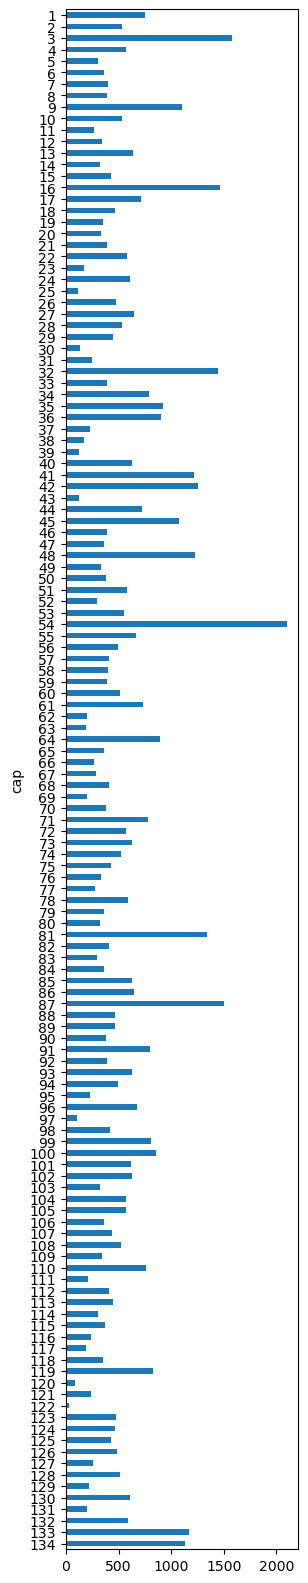

In [25]:
# Palabras distintas por capítulo
plt.figure()
df_tokens_cap.groupby(by='cap')['token'].nunique().plot(kind= 'barh', figsize=(3, 20))
plt.gca().invert_yaxis()
plt.show()

In [26]:
# Palabras más utilizadas por capítulo
df_tokens_cap.groupby(['cap','token'])['token'].count().reset_index(name='conteo').sort_values(['cap', 'conteo'], ascending=[True, False])

,cap,token,conteo
228,1,go,12
414,1,one,10
552,1,sea,10
698,1,upon,9
427,1,part,7
...,...,...,...
71364,134,yards,1
71366,134,yea,1
71367,134,years,1
71368,134,yell,1


## Correlación entre capítulos

In [27]:
df_pivote = df_tokens_cap.groupby(["cap","token"])["token"].agg(["count"]).reset_index().pivot(index = "token" , columns="cap", values= "count")
df_pivote.columns.name = None
df_pivote

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
token,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zoroaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
from scipy.spatial.distance import cosine

def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

df_pivote.corr(method=similitud_coseno)

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
1,1.000000,0.750842,0.730608,0.776327,0.777443,0.614090,0.807723,0.768615,0.755949,0.705265,...,0.634118,0.693088,0.728025,0.696532,0.793368,0.762758,0.748596,0.689172,0.754026,0.752709
2,0.750842,1.000000,0.757667,0.749963,0.696872,0.680890,0.712003,0.653940,0.656308,0.787381,...,0.647950,0.701101,0.668080,0.713358,0.667756,0.725141,0.653723,0.737296,0.620002,0.724650
3,0.730608,0.757667,1.000000,0.753006,0.726315,0.628328,0.673496,0.694655,0.493919,0.751600,...,0.679900,0.695609,0.537756,0.662430,0.737360,0.743256,0.691211,0.636862,0.681583,0.733028
4,0.776327,0.749963,0.753006,1.000000,0.707322,0.725394,0.744088,0.902021,0.701610,0.751003,...,0.666620,0.722422,0.805128,0.775984,0.770223,0.736422,0.855863,0.682876,0.751687,0.777292
5,0.777443,0.696872,0.726315,0.707322,1.000000,0.640778,0.808850,0.784907,0.709804,0.720059,...,0.815772,0.799475,0.851527,0.695613,0.756673,0.685377,0.815088,0.808301,0.770422,0.775108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.762758,0.725141,0.743256,0.736422,0.685377,0.743235,0.694338,0.772103,0.747740,0.723982,...,0.691004,0.655610,0.456059,0.703348,0.760362,1.000000,0.775145,0.708273,0.764794,0.744040
131,0.748596,0.653723,0.691211,0.855863,0.815088,0.738491,0.770385,0.782794,0.629035,0.815588,...,0.747115,0.651177,0.667114,0.727396,0.751956,0.775145,1.000000,0.668806,0.724717,0.761544
132,0.689172,0.737296,0.636862,0.682876,0.808301,0.650705,0.673306,0.695089,0.634319,0.632482,...,0.662581,0.756360,0.559999,0.742366,0.624361,0.708273,0.668806,1.000000,0.728815,0.785625
133,0.754026,0.620002,0.681583,0.751687,0.770422,0.729318,0.688140,0.723778,0.644267,0.771727,...,0.703638,0.716105,0.697188,0.736791,0.611874,0.764794,0.724717,0.728815,1.000000,0.855229


## Análisis de sentimiento

In [29]:
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [30]:
df_sentimiento = tweets_sentimientos = pd.merge(
                            left     = df_tokens_cap,
                            right    = lexicon,
                            left_on  = "token",
                            right_on = "termino",
                            how      = "inner"
                      )

In [31]:
df_sentimiento

,cap,token,termino,sentimiento
0,1,interest,interest,1
1,8,interest,interest,1
2,10,interest,interest,1
3,10,interest,interest,1
4,16,interest,interest,1
...,...,...,...,...
9680,134,breaching,breaching,-2
9681,134,breaching,breaching,-2
9682,134,struggled,struggled,-2
9683,134,jesus,jesus,1


In [32]:
def perfil_sentimientos(df):
    print(df.reset_index().loc[0,'cap'])
    print("=" * 12)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")
    print(" ")

In [33]:
for autor, df in df_sentimiento.groupby("cap"):
    perfil_sentimientos(df)


1
Positivos: 66.27
Neutros  : 0.0
Negativos: 33.73
 
2
Positivos: 46.38
Neutros  : 0.0
Negativos: 53.62
 
3
Positivos: 53.31
Neutros  : 0.0
Negativos: 46.69
 
4
Positivos: 52.11
Neutros  : 0.0
Negativos: 47.89
 
5
Positivos: 78.38
Neutros  : 0.0
Negativos: 21.62
 
6
Positivos: 73.53
Neutros  : 0.0
Negativos: 26.47
 
7
Positivos: 43.64
Neutros  : 0.0
Negativos: 56.36
 
8
Positivos: 79.55
Neutros  : 0.0
Negativos: 20.45
 
9
Positivos: 53.3
Neutros  : 0.0
Negativos: 46.7
 
10
Positivos: 64.47
Neutros  : 0.0
Negativos: 35.53
 
11
Positivos: 73.17
Neutros  : 0.0
Negativos: 26.83
 
12
Positivos: 50.0
Neutros  : 0.0
Negativos: 50.0
 
13
Positivos: 67.53
Neutros  : 0.0
Negativos: 32.47
 
14
Positivos: 48.28
Neutros  : 0.0
Negativos: 51.72
 
15
Positivos: 61.7
Neutros  : 0.0
Negativos: 38.3
 
16
Positivos: 56.67
Neutros  : 0.0
Negativos: 43.33
 
17
Positivos: 48.09
Neutros  : 0.0
Negativos: 51.91
 
18
Positivos: 50.0
Neutros  : 0.0
Negativos: 50.0
 
19
Positivos: 50.79
Neutros  : 0.0
Negativos: